# Visão Computacional com YOLOv8

In [1]:
import torch
print("CUDA disponível:", torch.cuda.is_available())
print("Nome da GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Nenhuma GPU CUDA")


CUDA disponível: True
Nome da GPU: NVIDIA GeForce RTX 4070 Laptop GPU


In [ ]:
# ! pip install ultralytics --upgrade
# ! pip install opencv-contrib-python --upgrade
# ! pip install opencv-python --upgrade



In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Carrega o modelo
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:01<00:00, 6.21MB/s]



0: 480x640 1 person, 73.5ms
Speed: 14.0ms preprocess, 73.5ms inference, 213.0ms postprocess per image at shape (1, 3, 480, 640)


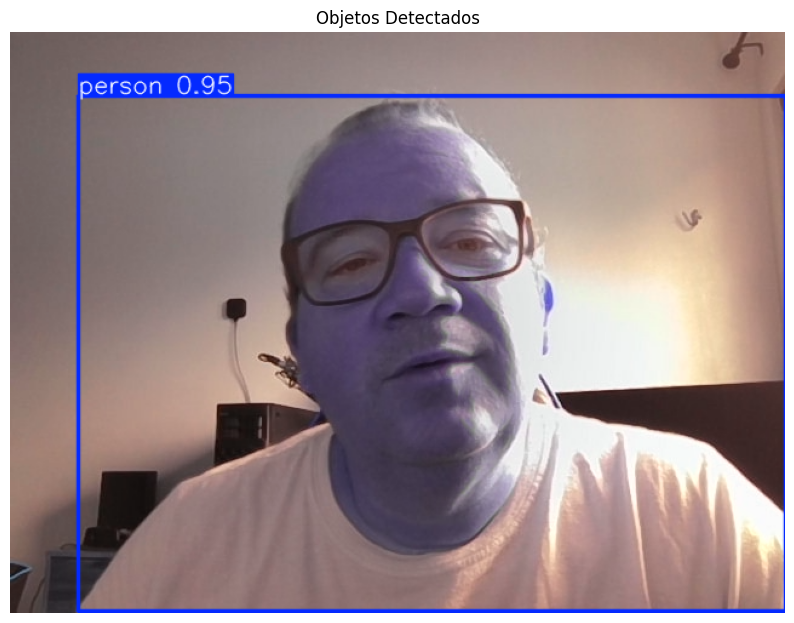

Objetos detectados: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell

In [3]:


def detectar_objetos(frame):
    # Faz a inferência
    results = model(frame)
    return results[0]

# Captura um frame da webcam
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

# Converte de BGR (OpenCV) para RGB (matplotlib)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Detecta objetos
result = detectar_objetos(frame_rgb)

# Desenha as caixas na imagem
annotated_frame = result.plot()  # já vem com caixas e labels desenhados

# Converte a imagem anotada para RGB para exibir no matplotlib
annotated_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

# Exibe a imagem no notebook
plt.figure(figsize=(10, 8))
plt.imshow(annotated_rgb)
plt.axis('off')
plt.title('Objetos Detectados')
plt.show()

# Imprime classes detectadas
print("Objetos detectados:", result.names)



0: 480x640 1 person, 19.7ms
Speed: 4.1ms preprocess, 19.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


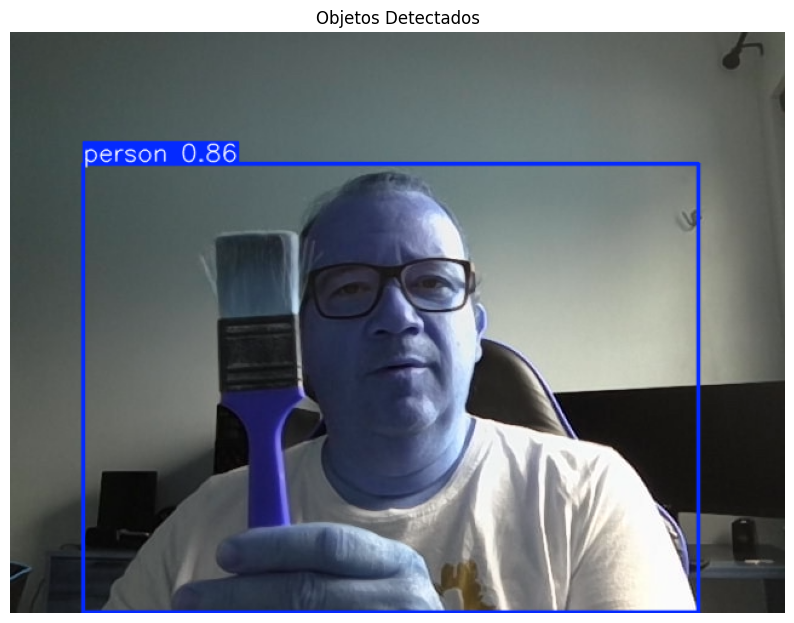

Objetos detectados: ['person']


In [6]:


# Função para detectar objetos
def detectar_objetos(frame):
    results = model(frame)[0]
    nomes = [results.names[int(cls)] for cls in results.boxes.cls]
    return results, nomes

# Captura um frame da webcam
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

# Converte para RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Detecta objetos
result, nomes_detectados = detectar_objetos(frame_rgb)

# Mostra imagem com detecções
annotated_frame = result.plot()
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Objetos Detectados")
plt.show()

# Lista de objetos detectados
print("Objetos detectados:", nomes_detectados)


In [11]:
from ultralytics import YOLO
import cv2
from collections import Counter

model = YOLO("yolov8m.pt")  # modelo mais preciso que o 'n'

def capture_image_and_describe():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cap.release()

    if not ret:
        return "Não foi possível capturar a imagem da câmera."

    # Aumenta a resolução da imagem
    frame = cv2.resize(frame, (1280, 720))

    results = model(frame)
    names = results[0].names
    boxes = results[0].boxes

    objetos = []
    for box in boxes:
        if box.conf < 0.6:  # ignora detecções fracas
            continue
        cls_id = int(box.cls)
        label = names[cls_id]
        objetos.append(label)

    if not objetos:
        return "Nenhum objeto foi detectado na imagem."

    contagem = Counter(objetos)
    descricoes = [f"{qtd} {obj}" if qtd > 1 else f"um(a) {obj}" for obj, qtd in contagem.items()]
    return "Na imagem foram detectados: " + ", ".join(descricoes) + "."


100%|██████████| 49.7M/49.7M [00:07<00:00, 6.76MB/s]


In [12]:
texto = capture_image_and_describe()
texto


0: 384x640 1 person, 1 toothbrush, 68.1ms
Speed: 2.9ms preprocess, 68.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


'Na imagem foram detectados: um(a) person.'

# Aumentando o numero de frames na captura (Estratégia ideal: detecção com limiar + agrupamento + contagem limitada)

In [ ]:
from ultralytics import YOLO
import cv2
from collections import defaultdict
import time

model = YOLO("yolov8x6.pt")

def capture_image_and_describe(frames_to_capture=5, delay_between_frames=0.3, conf_threshold=0.6):
    cap = cv2.VideoCapture(0)
    instancias = defaultdict(list)  # armazena contagem por classe em cada frame

    for _ in range(frames_to_capture):
        ret, frame = cap.read()
        if not ret:
            continue

        frame = cv2.resize(frame, (1280, 720))
        results = model(frame)
        names = results[0].names
        boxes = results[0].boxes

        count_this_frame = defaultdict(int)

        for box in boxes:
            if box.conf < conf_threshold:
                continue
            cls_id = int(box.cls)
            label = names[cls_id]
            count_this_frame[label] += 1

        for label, qtd in count_this_frame.items():
            instancias[label].append(qtd)

        time.sleep(delay_between_frames)

    cap.release()

    if not instancias:
        return "No objects were detected after multiple captures."

    descricoes = []
    for label, ocorrencias in instancias.items():
        media = sum(ocorrencias) / len(ocorrencias)
        if media < 1.5:
            descricoes.append(f"a {label}")
        else:
            descricoes.append(f"multiple {label}s")

    return "Na imagem foram detectados: " + ", ".join(sorted(descricoes)) + "."


100%|██████████| 49.7M/49.7M [01:46<00:00, 488kB/s] 


In [2]:
texto = capture_image_and_describe()
texto


0: 384x640 1 person, 55.7ms
Speed: 3.3ms preprocess, 55.7ms inference, 149.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.6ms
Speed: 2.3ms preprocess, 20.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bowl, 1 laptop, 19.8ms
Speed: 2.1ms preprocess, 19.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 27.6ms
Speed: 2.2ms preprocess, 27.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.8ms
Speed: 1.5ms preprocess, 16.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


'Na imagem foram detectados: a person.'